In [1]:
import sys

# Confirm that we're using Python 3
assert sys.version_info.major == 3, 'Oops, not running Python 3. Use Runtime > Change runtime type'

In [2]:
print("Installing dependencies for Colab environment")
pip install -Uq grpcio==1.26.0

import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import subprocess

print('TensorFlow version: {}'.format(tf.__version__))

Installing dependencies for Colab environment
     |████████████████████████████████| 2.4 MB 31.3 MB/s 
TensorFlow version: 2.8.2


Import the Fashion MNIST dataset

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4431872/4422102 [==============================] - 0s 0us/step


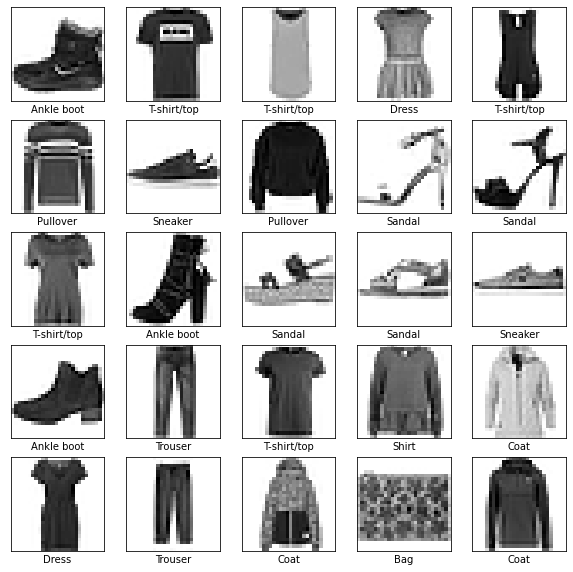

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [5]:
# scale the values to 0.0 to 1.0
train_images = train_images / 255.0
test_images = test_images / 255.0

# reshape for feeding into the model
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)



print('\ntrain_images.shape: {}, of {}'.format(train_images.shape, train_images.dtype))
print('test_images.shape: {}, of {}'.format(test_images.shape, test_images.dtype))


train_images.shape: (60000, 28, 28, 1), of float64
test_images.shape: (10000, 28, 28, 1), of float64


In [6]:
x_val = train_images[-10000:] 
y_val = train_labels[-10000:] 
x_train = train_images[:-10000] 
y_train = train_labels[:-10000] 
print(x_train.shape)

(50000, 28, 28, 1)


In [7]:
x_train=x_train.reshape(len(x_train),28,28,1) 
x_val=x_val.reshape(len(x_val),28,28,1)
test_images = test_images.reshape(len(test_images),28,28,1)

In [8]:
model1 = keras.Sequential([
  keras.layers.Conv2D(input_shape=(28,28,1), filters=8, kernel_size=3, 
                      strides=2, activation='relu', name='Conv1'),
  keras.layers.Flatten(),
  keras.layers.Dense(10, name='Dense')
])
model1.summary()

testing = False
epochs = 10

model1.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['Accuracy'])
history1 = model1.fit(x_train, y_train,validation_data=(x_val,y_val), epochs=epochs)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1 (Conv2D)              (None, 13, 13, 8)         80        
                                                                 
 flatten (Flatten)           (None, 1352)              0         
                                                                 
 Dense (Dense)               (None, 10)                13530     
                                                                 
Total params: 13,610
Trainable params: 13,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1563/1563 [==============================] - 18s 3ms/step - loss: 0.5715 - Accuracy: 0.8016 - val_loss: 0.4999 - val_Accuracy: 0.8198
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4486 - Accuracy: 0.8442 - val_loss: 0.4410 - val_Accuracy: 0.8434
Epoch 3/10
1563/1563 [=====

In [9]:
test_loss, test_acc = model1.evaluate(test_images, test_labels)
print('\n\nTest accuracy: {}'.format(test_acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.3642 - Accuracy: 0.8716


Test accuracy: 0.8715999722480774


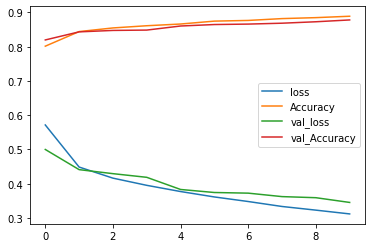

In [10]:
pd.DataFrame(history1.history).plot()

In [11]:
model2 = keras.Sequential([
  keras.layers.Conv2D(input_shape=(28,28,1), filters=8, kernel_size=3, 
                      strides=2, activation='relu', name='Conv1'),
 keras.layers.Conv2D(1024,kernel_size=3,strides=2,activation='relu',name='Conv2'),
  keras.layers.Flatten(),
  keras.layers.Dense(10, name='Dense')
])
model2.summary()

testing = False
epochs = 10

model2.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['Accuracy'])
history2 = model2.fit(train_images, train_labels,validation_data=(x_val,y_val),epochs=epochs)



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1 (Conv2D)              (None, 13, 13, 8)         80        
                                                                 
 Conv2 (Conv2D)              (None, 6, 6, 1024)        74752     
                                                                 
 flatten_1 (Flatten)         (None, 36864)             0         
                                                                 
 Dense (Dense)               (None, 10)                368650    
                                                                 
Total params: 443,482
Trainable params: 443,482
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4194 - Accuracy: 0.8498 - val_loss: 0.3165 - val_Accuracy: 0.8836
Epoch 2/10
1875/1875 [==============

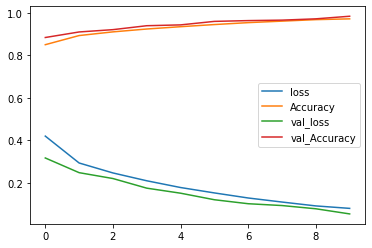

In [12]:
pd.DataFrame(history2.history).plot()

In [13]:
test_loss, test_acc = model2.evaluate(test_images, test_labels)

print('\n\nTest accuracy: {}'.format(test_acc))

313/313 [==============================] - 1s 3ms/step - loss: 0.3248 - Accuracy: 0.9067


Test accuracy: 0.9067000150680542


**Saving Model**

In [14]:
import tempfile

MODEL_DIR = tempfile.gettempdir()
version = 1
export_path = os.path.join(MODEL_DIR, str(version))
print('export_path = {}\n'.format(export_path))

tf.keras.models.save_model(
    model2,
    export_path,
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None
)

print('\nSaved model:')
!ls -l {export_path}

export_path = /tmp/1




Saved model:
total 112
drwxr-xr-x 2 root root  4096 Oct  3 06:26 assets
-rw-r--r-- 1 root root 10884 Oct  3 06:26 keras_metadata.pb
-rw-r--r-- 1 root root 92414 Oct  3 06:26 saved_model.pb
drwxr-xr-x 2 root root  4096 Oct  3 06:26 variables


Examing our saved model

In [15]:
!saved_model_cli show --dir {export_path} --all


MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['__saved_model_init_op']:
  The given SavedModel SignatureDef contains the following input(s):
  The given SavedModel SignatureDef contains the following output(s):
    outputs['__saved_model_init_op'] tensor_info:
        dtype: DT_INVALID
        shape: unknown_rank
        name: NoOp
  Method name is: 

signature_def['serving_default']:
  The given SavedModel SignatureDef contains the following input(s):
    inputs['Conv1_input'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 28, 28, 1)
        name: serving_default_Conv1_input:0
  The given SavedModel SignatureDef contains the following output(s):
    outputs['Dense'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 10)
        name: StatefulPartitionedCall:0
  Method name is: tensorflow/serving/predict

Concrete Functions:
  Function Name: '__call__'
    Option #1
      Callable with:
        Argument #1
          Conv1_input

Serving our model with TensorFlow Serving

In [16]:
import sys
# We need sudo prefix if not on a Google Colab.
if 'google.colab' not in sys.modules:
  SUDO_IF_NEEDED = 'sudo'
else:
  SUDO_IF_NEEDED = ''

In [17]:
!wget 'http://storage.googleapis.com/tensorflow-serving-apt/pool/tensorflow-model-server-universal-2.8.0/t/tensorflow-model-server-universal/tensorflow-model-server-universal_2.8.0_all.deb'
!dpkg -i tensorflow-model-server-universal_2.8.0_all.deb

--2022-10-03 06:26:45--  http://storage.googleapis.com/tensorflow-serving-apt/pool/tensorflow-model-server-universal-2.8.0/t/tensorflow-model-server-universal/tensorflow-model-server-universal_2.8.0_all.deb
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.62.128, 172.217.1.208, 172.253.115.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.62.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 335421916 (320M) [application/x-debian-package]
Saving to: ‘tensorflow-model-server-universal_2.8.0_all.deb’

tensorflow-model-se 100%[===================>] 319.88M  13.2MB/s    in 25s     

2022-10-03 06:27:10 (12.9 MB/s) - ‘tensorflow-model-server-universal_2.8.0_all.deb’ saved [335421916/335421916]

Selecting previously unselected package tensorflow-model-server-universal.
(Reading database ... 159447 files and directories currently installed.)
Preparing to unpack tensorflow-model-server-universal_2.8.0_all.deb ...
Unpack

Installing TensorFlow Serving

In [18]:
!{SUDO_IF_NEEDED} apt-get install tensorflow-model-server

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package tensorflow-model-server


Run the TensorFlow Model Server

we will write the value of the Python variable to an environment variable using the os.environ function.

In [19]:
os.environ["MODEL_DIR"] = MODEL_DIR

We will now launch the TensorFlow model server with a bash script.

In [20]:
%%bash --bg 
nohup tensorflow_model_server \
  --rest_api_port=8501 \
  --model_name=fashion_model \
  --model_base_path="${MODEL_DIR}" >server.log 2>&1


In [21]:
!tail server.log

Make a request to your model in TensorFlow Serving

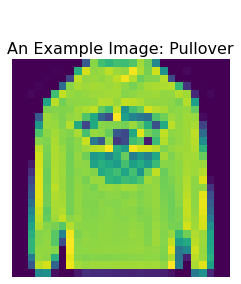

In [22]:
def show(idx, title):
  plt.figure()
  plt.imshow(test_images[idx].reshape(28,28))
  plt.axis('off')
  plt.title('\n\n{}'.format(title), fontdict={'size': 16})

import random
rando = random.randint(0,len(test_images)-1)
show(rando, 'An Example Image: {}'.format(class_names[test_labels[rando]]))

In [23]:
import json
data = json.dumps({"signature_name": "serving_default", "instances": test_images[0:3].tolist()})
print('Data: {} ... {}'.format(data[:50], data[len(data)-52:]))

Data: {"signature_name": "serving_default", "instances": ...  [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]]]]}


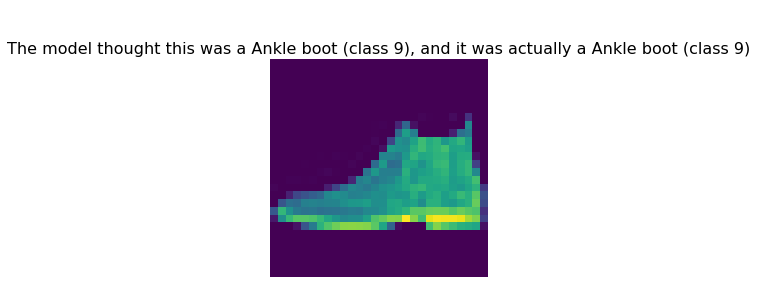

In [24]:
!pip install -q requests

import requests

headers = {"content-type": "application/json"}
json_response = requests.post('http://localhost:8501/v1/models/fashion_model:predict', data=data, headers=headers)
predictions = json.loads(json_response.text)['predictions']

show(0, 'The model thought this was a {} (class {}), and it was actually a {} (class {})'.format(class_names[np.argmax(predictions[0])], np.argmax(predictions[0]), class_names[test_labels[0]], test_labels[0]))

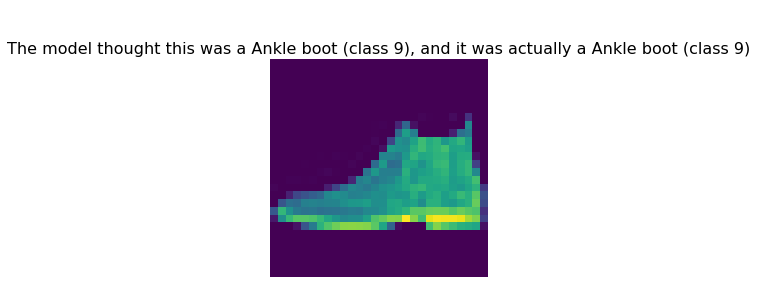

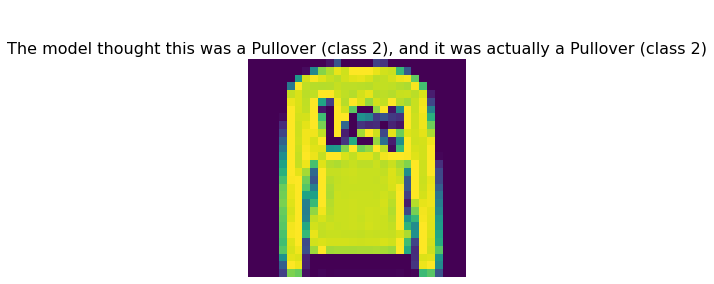

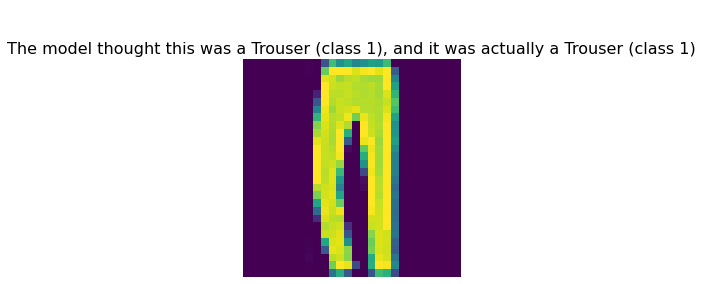

In [25]:
# docs_infra: no_execute
headers = {"content-type": "application/json"}
json_response = requests.post('http://localhost:8501/v1/models/fashion_model/versions/1:predict', data=data, headers=headers)
predictions = json.loads(json_response.text)['predictions']

for i in range(0,3):
  show(i, 'The model thought this was a {} (class {}), and it was actually a {} (class {})'.format(
    class_names[np.argmax(predictions[i])], np.argmax(predictions[i]), class_names[test_labels[i]], test_labels[i]))